# Importar librerías y modelo

In [1]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%cd Query-Images
!dir

d:\Desktop\Octavo Semestre\Desarrollo de aplicaciones\M2\MachineLearningProject\Query-Images


c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


 El volumen de la unidad D es Data
 El n�mero de serie del volumen es: 6674-C3FF

 Directorio de d:\Desktop\Octavo Semestre\Desarrollo de aplicaciones\M2\MachineLearningProject\Query-Images

28/05/2024  10:43 p. m.    <DIR>          .
29/05/2024  12:17 p. m.    <DIR>          ..
29/05/2024  12:11 a. m.    <DIR>          query
               0 archivos              0 bytes
               3 dirs  276,858,527,744 bytes libres


# Query de imagenes

In [3]:
def get_class(vector):
  for i, pred in enumerate(vector):
    if pred == 1:
      return i

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


c:\Users\Migue\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\saving\saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 12 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


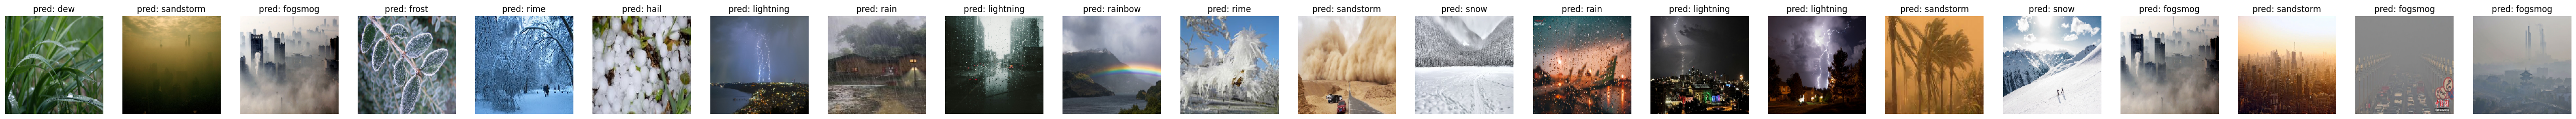

In [26]:
label_map = {
  0: "dew",
  1: "fogsmog",
  2: "frost",
  3: "glaze",
  4: "hail",
  5: "lightning",
  6: "rain",
  7: "rainbow",
  8: "rime",
  9: "sandstorm",
  10: "snow",
}

images_names = [
  "dew", "fogsmog_1", "fogsmog", "frost", "glaze", "hail", "lightning", "rain", "rain_1", "rainbow", "rime", "sandstorm", "snow", "rain_2",
  "lightning_1", "lightning_2", "sandstorm_1", "snow_1", "fogsmog_2", "fogsmog_3", "fogsmog_4", "fogsmog_5"
]

num_images = len(images_names)

base_dir = ""

query_dir = os.path.join(base_dir, "query")

f, axarr = plt.subplots(1, num_images, figsize=(num_images*3, 4))

model = models.load_model("../my_model_2.keras")

for i in range(num_images):
  img_path = query_dir + "/" + images_names[i] + ".jpg"
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.

  prediction = model.predict(img_tensor)
  predicted_class_num = (prediction > 0.5).astype("int32")
  predicted_class_name = label_map.get(get_class(predicted_class_num[0]))
  
  axarr[i].set_title(f"pred: {predicted_class_name}")
  axarr[i].imshow(img)
  axarr[i].axis("off")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


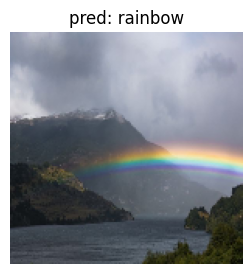

In [31]:
def query_image(name, model_name):
  base_dir = ""
  query_dir = os.path.join(base_dir, "query")

  model = models.load_model(f"../{model_name}.keras")


  f, axarr = plt.subplots(1, 1, figsize=(3, 4))

  img_path = query_dir + "/" + name + ".jpg"
  img = image.load_img(img_path, target_size=(150, 150))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor, axis=0)
  img_tensor /= 255.

  prediction = model.predict(img_tensor)
  predicted_class_num = (prediction > 0.5).astype("int32")
  predicted_class_name = label_map.get(get_class(predicted_class_num[0]))
  
  axarr.set_title(f"pred: {predicted_class_name}")
  axarr.imshow(img)
  axarr.axis("off")

query_image("rainbow", "my_model_2")
